In [34]:
## CONCLUSIONS
# 1. 
# 2.
# 3.

import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
import random
import numpy as np

from config import api_key
from pprint import pprint
from citipy import citipy

In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Will replace this with random 500 cities


In [36]:
np.random.uniform(-180, 180, 1000)

array([  92.59845067,  145.8320373 , -174.54564098, -173.78763184,
       -137.13022855,  -99.44211103, -122.31490195, -152.67871726,
       -170.18731461, -152.88377723,    7.97913801, -119.9172527 ,
        -82.5201174 ,  -10.5810148 ,   44.44344201,   -5.009561  ,
        146.60009099,  162.33073829,  134.82162575,  -15.28102837,
       -154.22181231,  -39.22956182, -163.22908015,  -16.46814183,
        -73.54320047,   -1.48882129,  102.79391404,   33.95683286,
        -75.63528716,   11.82734908,  -27.46785947, -154.58040737,
       -164.71988717,   33.37987329,  160.03766839,   96.19993412,
       -176.45410721,   65.4405591 ,  -96.03988236,  -93.29302625,
         40.32040776,  173.10708882,  -99.91652647,  135.08583879,
         15.21982443,   28.43928493,   70.27724615,  -63.33392854,
       -179.51890829,  -59.04799678,  127.85905825,   50.39430428,
        100.04607095,  102.41001994,   13.16829137, -113.9584531 ,
         77.08701932,   62.05713355,  148.84990319,   89.65259

In [42]:
# Generate list of 500 random cities

cities = []

while len(set(cities)) < 500:
    lat, lon = np.random.uniform(-180, 180), np.random.uniform(-90, 90)
    city = citipy.nearest_city(lat, lon)
    city = city.city_name
    if city not in cities:
        cities.append(city)
cities = ['Aruba']

In [43]:
len(set(cities))

1

In [44]:
country = []
date = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    # pprint(response['coord']['lat'])
    country.append(response['sys']['country'])
    date.append(response['dt'])
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    max_temp.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    
max_temp

[80.6]

In [45]:
requests.get(query_url + city).json()

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.5, 'lon': -69.97},
 'dt': 1522886400,
 'id': 3577279,
 'main': {'humidity': 83,
  'pressure': 1011,
  'temp': 80.6,
  'temp_max': 80.6,
  'temp_min': 80.6},
 'name': 'Aruba',
 'sys': {'country': 'AW',
  'id': 4150,
  'message': 0.0035,
  'sunrise': 1522924420,
  'sunset': 1522968691,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02n',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 16.11}}

In [48]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longtitude": lon,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
pd.weather_data.to_csv("Cities.xlsx")

AttributeError: module 'pandas' has no attribute 'weather_data'

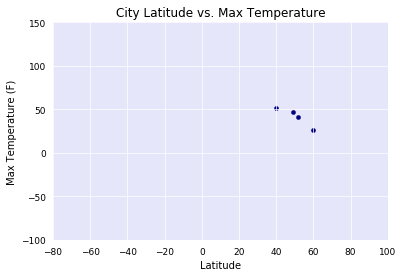

In [39]:
# SCATTER PLOT 1: TEMP VS. LATITUDE

ax = weather_data.plot(
    kind = 'scatter', 
    x = "Latitude", 
    y = "Max Temperature", 
    color = 'navy',  
    linewidth=0.2,
    fontsize = 9
)

# Titles
ax.set_title("City Latitude vs. Max Temperature")
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')

# Set min/max of x/y axes
ax.set_xlim(-80,100)
ax.set_ylim(-100,150)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('1_CityLatitude_vs_MaxTemperature.png')
plt.show()

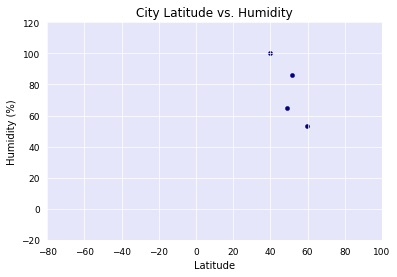

In [40]:
# SCATTER PLOT 2: HUMIDITY VS. LATITUDE

ax = weather_data.plot(
    kind = 'scatter', 
    x = "Latitude", 
    y = "Humidity", 
    color = 'navy',  
    linewidth=0.2,
    fontsize = 9
)

# Titles
ax.set_title("City Latitude vs. Humidity")
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')

# Set min/max of x/y axes
ax.set_xlim(-80,100)
ax.set_ylim(-20,120)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('2_CityLatitude_vs_Humidity.png')
plt.show()


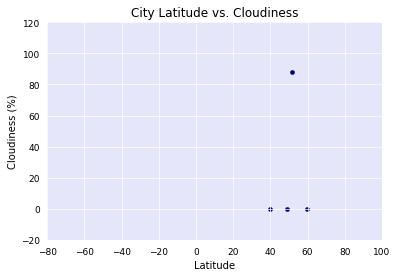

In [41]:
# SCATTER PLOT 3: CLOUDINESS VS. LATITUDE

ax = weather_data.plot(
    kind = 'scatter', 
    x = "Latitude", 
    y = "Cloudiness", 
    color = 'navy',  
    linewidth=0.2,
    fontsize = 9
)

# Titles
ax.set_title("City Latitude vs. Cloudiness")
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')

# Set min/max of x/y axes
ax.set_xlim(-80,100)
ax.set_ylim(-20,120)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('3_CityLatitude_vs_Cloudiness.png')
plt.show()

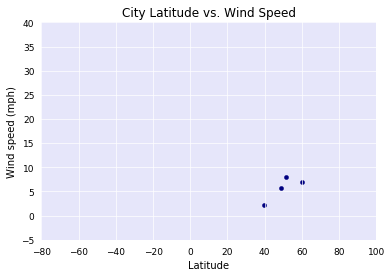

In [42]:
# SCATTER PLOT 4: WIND SPEED VS. LATITUDE

ax = weather_data.plot(
    kind = 'scatter', 
    x = "Latitude", 
    y = "Wind Speed", 
    color = 'navy',  
    linewidth=0.2,
    fontsize = 9
)

# Titles
ax.set_title("City Latitude vs. Wind Speed")
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind speed (mph)')

# Set min/max of x/y axes
ax.set_xlim(-80,100)
ax.set_ylim(-5,40)

# Format colors
ax.set_facecolor('lavender')
ax.grid(color='w', linestyle='-', linewidth=0.7)
for tick in ax.get_xticklines():
    tick.set_color('white')
for tick in ax.get_yticklines():
    tick.set_color('white')
    
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('4_CityLatitude_vs_WindSpeed.png')
plt.show()